In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df = pd.read_parquet('rail_data_cleaned_20230728132300.parquet')

### Dropping columns we don't need

In [130]:
dropped = ['working_time_pass', 'pass', 'train_length']

In [131]:
df = df.drop(columns=dropped)

In [132]:
df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,5,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,B,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,A,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,1,NaT,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94233,202307278055183,P55183,2023-07-27,Darwin,BRADIN,2023-07-27 17:30:30,2023-07-27 17:33:30,2023-07-27 17:31:00,2023-07-27 17:33:00,4,2023-07-27 18:07:00,2023-07-27 18:08:00,True,True
94235,202307278055183,P55183,2023-07-27,Darwin,HLFX,2023-07-27 17:44:00,2023-07-27 17:45:00,2023-07-27 17:44:00,2023-07-27 17:45:00,1,2023-07-27 18:18:00,2023-07-27 18:19:00,True,True
94238,202307278055183,P55183,2023-07-27,Darwin,HBDNBDG,2023-07-27 17:58:30,2023-07-27 18:01:30,2023-07-27 17:59:00,2023-07-27 18:01:00,1,2023-07-27 18:29:00,2023-07-27 18:30:00,True,True
94240,202307278055183,P55183,2023-07-27,Darwin,TODMRDN,2023-07-27 18:08:30,2023-07-27 18:09:30,2023-07-27 18:09:00,2023-07-27 18:09:00,1,2023-07-27 18:35:00,2023-07-27 18:35:00,True,True


## Round 1
#### Eliminating rows with duplicate id and train platforms in conjunction with null actuals

In [107]:
# Subset of columns to consider for duplicates
subset_columns = ['unique_id', 'train_platform']

# Find rows with duplicated unique_id and train_platform
duplicates = df.duplicated(subset=subset_columns, keep=False)

# Find rows with null values in actual_arrival_time and actual_departure_time
null_rows = (df['actual_arrival_time'].isnull()) & (df['actual_departure_time'].isnull())

# Combine the conditions to get the rows to be removed
rows_to_remove = duplicates & null_rows

# Keep the rows that are not in rows_to_remove
df_cleaned = df[~rows_to_remove]


In [108]:
df_cleaned

## Get the time difference between planning and actual

In [141]:
# Create a copy of the DataFrame to avoid modifying the original
df_cleaned_copy = df_cleaned.copy()

# Convert string columns with datetime information to datetime objects using .loc
time_columns = ['planned_time_arrival', 'actual_arrival_time']
for col in time_columns:
    df_cleaned_copy.loc[:, col] = pd.to_datetime(df_cleaned_copy[col])

# Calculate the time difference and create a new column using .loc
df_cleaned_copy['arrival_time_difference'] = df_cleaned_copy['actual_arrival_time'] - df_cleaned_copy['planned_time_arrival']

# Display the DataFrame with the new column
df_cleaned_copy


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,hour,arrival_time_difference
8,202307277679020,L79020,2023-07-27,Darwin,STFD,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,5,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True,0,NaT
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True,0,NaT
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,B,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True,0,NaT
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,A,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True,0,NaT
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,1,NaT,NaT,False,False,21,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94233,202307278055183,P55183,2023-07-27,Darwin,BRADIN,2023-07-27 17:30:30,2023-07-27 17:33:30,2023-07-27 17:31:00,2023-07-27 17:33:00,4,2023-07-27 18:07:00,2023-07-27 18:08:00,True,True,17,0 days 00:36:00
94235,202307278055183,P55183,2023-07-27,Darwin,HLFX,2023-07-27 17:44:00,2023-07-27 17:45:00,2023-07-27 17:44:00,2023-07-27 17:45:00,1,2023-07-27 18:18:00,2023-07-27 18:19:00,True,True,17,0 days 00:34:00
94238,202307278055183,P55183,2023-07-27,Darwin,HBDNBDG,2023-07-27 17:58:30,2023-07-27 18:01:30,2023-07-27 17:59:00,2023-07-27 18:01:00,1,2023-07-27 18:29:00,2023-07-27 18:30:00,True,True,17,0 days 00:30:00
94240,202307278055183,P55183,2023-07-27,Darwin,TODMRDN,2023-07-27 18:08:30,2023-07-27 18:09:30,2023-07-27 18:09:00,2023-07-27 18:09:00,1,2023-07-27 18:35:00,2023-07-27 18:35:00,True,True,18,0 days 00:26:00


In [142]:

# Group by the presence of null values in working_time_arrival and calculate sum of True values
null_delay_counts = df_cleaned.groupby(df_cleaned['planned_time_arrival'].isnull())['is_delayed_arrival'].sum()

# Display the result
print("Counts of delayed arrivals based on the presence of null planned_time_arrival:")
print(null_delay_counts)

Counts of delayed arrivals based on the presence of null planned_time_arrival:
planned_time_arrival
False     622
True     1772
Name: is_delayed_arrival, dtype: int64


In [143]:
df_cleaned['planned_time_arrival'].isnull().sum()

3229

In [133]:

# Group by train platform and count the delayed arrivals and departures
platform_delay_counts = df_cleaned.groupby('train_platform')[['is_delayed_arrival', 'is_delayed_departure']].sum()

# Calculate the total delayed events for each platform
platform_delay_counts['total_delayed_events'] = platform_delay_counts['is_delayed_arrival'] + platform_delay_counts['is_delayed_departure']

# Find the platform with the most delayed events
most_delayed_platform = platform_delay_counts['total_delayed_events'].idxmax()
max_delayed_events = platform_delay_counts['total_delayed_events'].max()

print(f"The train platform with the most delayed events is {most_delayed_platform} with {max_delayed_events} delayed events.")


The train platform with the most delayed events is CRKLWD with 189 delayed events.


In [134]:
platform_delay_counts

,is_delayed_arrival,is_delayed_departure,total_delayed_events
train_platform,,,
ABDO,0,0,0
ABDVY,0,0,0
ABER,0,0,0
ABGLELE,1,1,2
ABHLJN,0,0,0
...,...,...,...
YOVILPM,1,1,2
YRDLYWD,0,0,0
YSTRADM,0,0,0


In [135]:

# Group by update_origin and count the True values under is_delayed_arrival
origin_delay_counts = df_cleaned.groupby('update_origin')['is_delayed_arrival'].sum()

# Find the update_origin with the most True values
most_delayed_origin = origin_delay_counts.idxmax()
max_delayed_count = origin_delay_counts.max()

print(f"The update_origin with the most delayed arrivals is '{most_delayed_origin}' with {max_delayed_count} delayed arrivals.")


The update_origin with the most delayed arrivals is 'Darwin' with 2371 delayed arrivals.


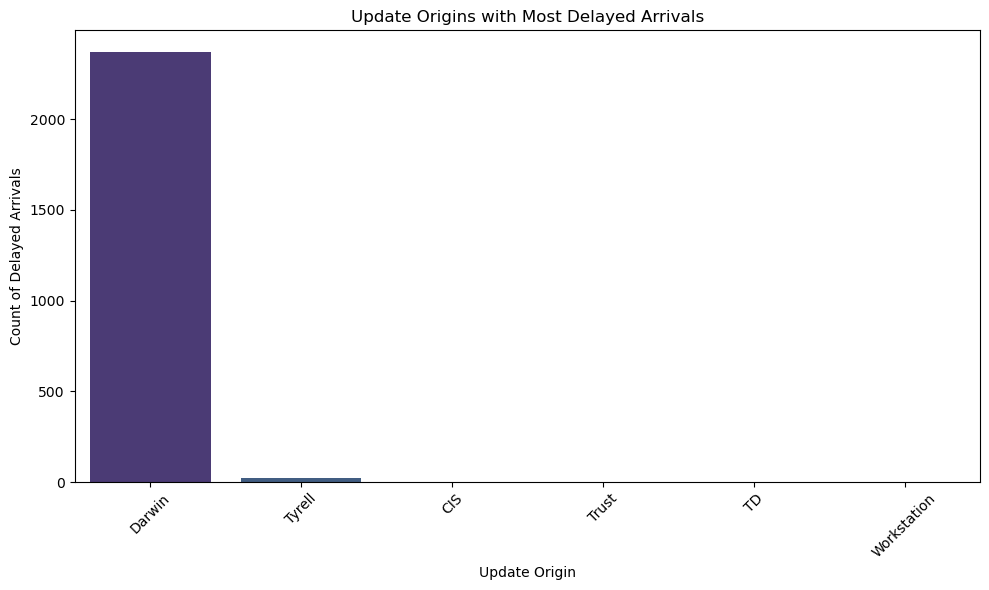

In [136]:
# Assuming you have already created the df_cleaned DataFrame

# Group by update_origin and count the True values under is_delayed_arrival
origin_delay_counts = df_cleaned.groupby('update_origin')['is_delayed_arrival'].sum()

# Convert the Series to a DataFrame for plotting
origin_delay_df = origin_delay_counts.reset_index(name='count')

# Sort the DataFrame by count in descending order
origin_delay_df = origin_delay_df.sort_values(by='count', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='update_origin', y='count', data=origin_delay_df, palette='viridis')
plt.xlabel('Update Origin')
plt.ylabel('Count of Delayed Arrivals')
plt.title('Update Origins with Most Delayed Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [137]:
origin_delay_df

,update_origin,count
1,Darwin,2371
4,Tyrell,21
0,CIS,1
3,Trust,1
2,TD,0
5,Workstation,0


#### Looking at a busy route to evaluate cleaning

In [109]:
popular_id = df_cleaned[df_cleaned['unique_id'] == 'Y55129']

In [110]:
popular_id

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
24918,202307288955129,Y55129,2023-07-28,Trust,BRENTX,2023-07-28 01:13:30,2023-07-28 01:14:00,NaT,NaT,1,2023-07-28 01:19:00,2023-07-28 01:20:00,False,False
24919,202307288955129,Y55129,2023-07-28,Trust,CRKLWD,2023-07-28 01:15:30,2023-07-28 01:17:00,2023-07-28 01:16:00,2023-07-28 01:17:00,1,2023-07-28 01:21:00,2023-07-28 01:22:00,False,False
24920,202307288955129,Y55129,2023-07-28,Trust,WHMPSTM,2023-07-28 01:20:00,2023-07-28 01:20:30,2023-07-28 01:20:00,2023-07-28 01:20:00,1,2023-07-28 01:24:00,2023-07-28 01:25:00,False,False
24922,202307288955129,Y55129,2023-07-28,Trust,KNTSHTN,2023-07-28 01:24:00,2023-07-28 01:24:30,2023-07-28 01:24:00,2023-07-28 01:24:00,1,2023-07-28 01:28:00,2023-07-28 01:29:00,False,False
24924,202307288955129,Y55129,2023-07-28,Trust,STPXBOX,2023-07-28 01:30:00,2023-07-28 01:32:00,2023-07-28 01:30:00,2023-07-28 01:32:00,A,2023-07-28 01:33:00,2023-07-28 01:34:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92756,202307288955129,Y55129,2023-07-28,Darwin,SELHRST,2023-07-28 02:02:30,2023-07-28 02:03:00,NaT,NaT,1,2023-07-28 02:04:00,2023-07-28 02:04:00,False,False
92758,202307288955129,Y55129,2023-07-28,Darwin,ECROYDN,2023-07-28 02:06:00,2023-07-28 02:07:00,2023-07-28 02:06:00,2023-07-28 02:07:00,5,2023-07-28 02:06:00,2023-07-28 02:07:00,False,False
92761,202307288955129,Y55129,2023-07-28,Darwin,PURLEY,2023-07-28 02:12:00,2023-07-28 02:13:00,2023-07-28 02:12:00,2023-07-28 02:13:00,2,2023-07-28 02:12:00,2023-07-28 02:13:00,False,False
92768,202307288955129,Y55129,2023-07-28,Darwin,HORLEY,2023-07-28 02:25:30,2023-07-28 02:26:00,2023-07-28 02:26:00,2023-07-28 02:26:00,2,2023-07-28 02:26:00,2023-07-28 02:26:00,False,False


In [111]:
popular_id['train_platform'].nunique()

23

In [112]:
popular_id['actual_arrival_time'].isna()

24918    False
24919    False
24920    False
24922    False
24924    False
         ...  
92756    False
92758    False
92761    False
92768    False
92769    False
Name: actual_arrival_time, Length: 98, dtype: bool

## Picking out top 20 busiest stations

In [113]:
df_cleaned['train_platform'].value_counts()

LNDNBDE    312
WLOE       162
ECROYDN    147
STKP       146
CRKLWD     146
          ... 
BRUTON       1
SGOS         1
WRGTCCS      1
BCKY         1
PRKSTON      1
Name: train_platform, Length: 2603, dtype: int64

In [114]:
platforms_to_filter = ['LNDNBDE', 'WLOE', 'ECROYDN', 'STKP', 'CRKLWD', 'VAUXHLM', 'GTWK', 'CLPHMJM',
                       'RDNGSTN', 'BLFR', 'LEWISHM', 'CTMSLNK', 'FRNDNLT', 'WDON', 'WCHAPXR', 'MKNSCEN',
                       'STPXBOX', 'STAFFRD', 'BHAMNWS', 'FRNDXR']
filtered_df = df_cleaned[df_cleaned['train_platform'].isin(platforms_to_filter)]

In [115]:
filtered_df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
88,202307277194778,G94778,2023-07-27,Darwin,LEWISHM,2023-07-27 22:11:00,2023-07-27 22:12:00,2023-07-27 22:11:00,2023-07-27 22:12:00,1,2023-07-27 22:11:00,2023-07-27 22:12:00,False,False
102,202307278954536,Y54536,2023-07-27,CIS,STPXBOX,2023-07-27 21:34:00,2023-07-27 21:35:00,2023-07-27 21:34:00,2023-07-27 21:35:00,A,2023-07-27 21:34:00,2023-07-27 21:35:00,False,False
160,202307287623224,L23224,2023-07-28,CIS,VAUXHLM,2023-07-28 23:23:00,2023-07-28 23:24:00,2023-07-28 23:23:00,2023-07-28 23:24:00,8,2023-07-28 23:23:00,2023-07-28 23:24:00,False,False
343,202307278075284,P75284,2023-07-27,TD,RDNGSTN,2023-07-27 20:59:00,2023-07-27 21:03:00,2023-07-27 21:00:00,2023-07-27 21:03:00,10,2023-07-27 21:22:00,2023-07-27 21:23:00,False,False
370,202307278954008,Y54008,2023-07-27,TD,FRNDNLT,2023-07-27 22:10:30,2023-07-27 22:11:30,2023-07-27 22:11:00,2023-07-27 22:11:00,4,NaT,2023-07-27 22:11:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94074,202307277674792,L74792,2023-07-27,CIS,WLOE,2023-07-27 19:36:30,2023-07-27 19:37:30,2023-07-27 19:37:00,2023-07-27 19:37:00,A,2023-07-27 19:37:00,2023-07-27 19:37:00,False,False
94076,202307277674792,L74792,2023-07-27,CIS,LNDNBDE,2023-07-27 19:41:00,2023-07-27 19:43:00,2023-07-27 19:41:00,2023-07-27 19:43:00,7,2023-07-27 19:41:00,2023-07-27 19:43:00,False,False
94159,202307277679378,L79378,2023-07-27,CIS,WCHAPXR,2023-07-27 20:20:30,2023-07-27 20:21:30,2023-07-27 20:21:00,2023-07-27 20:21:00,B,2023-07-27 20:21:00,2023-07-27 20:21:00,False,False
94172,202307288071669,P71669,2023-07-28,Darwin,BHAMNWS,2023-07-28 08:42:00,2023-07-28 08:46:00,2023-07-28 08:42:00,2023-07-28 08:46:00,8,2023-07-28 08:42:00,2023-07-28 08:46:00,False,False


In [116]:
top_delayed = filtered_df[filtered_df['is_delayed_arrival']== True]

In [117]:
top_delayed

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
677,202307277622356,L22356,2023-07-27,Darwin,CLPHMJM,2023-07-27 19:11:00,2023-07-27 19:12:30,2023-07-27 19:11:00,2023-07-27 19:12:00,7,2023-07-27 19:36:00,2023-07-27 19:37:00,True,True
2048,202307278952592,Y52592,2023-07-27,Darwin,FRNDNLT,2023-07-27 00:32:00,2023-07-27 00:35:30,NaT,NaT,3,2023-07-27 00:55:00,2023-07-27 00:56:00,True,True
2050,202307278952592,Y52592,2023-07-27,Darwin,BLFR,2023-07-27 00:38:00,2023-07-27 00:38:00,NaT,NaT,1,2023-07-27 00:59:00,2023-07-27 00:59:00,True,True
3176,202307287503298,K03298,2023-07-28,Darwin,STAFFRD,2023-07-28 03:20:00,2023-07-28 03:24:00,NaT,NaT,6,2023-07-28 04:04:00,2023-07-28 04:05:00,True,True
3411,202307278075392,P75392,2023-07-27,Darwin,RDNGSTN,2023-07-27 17:26:00,2023-07-27 17:29:00,2023-07-27 17:26:00,2023-07-27 17:29:00,7,2023-07-27 17:59:00,2023-07-27 18:00:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93355,202307286707727,C07727,2023-07-28,Darwin,CRKLWD,2023-07-28 00:13:30,2023-07-28 00:15:00,NaT,NaT,2,2023-07-28 04:06:00,2023-07-28 04:07:00,True,True
93357,202307286707727,C07727,2023-07-28,Darwin,CRKLWD,2023-07-28 00:32:00,2023-07-28 00:39:00,NaT,NaT,DER,2023-07-28 04:15:00,2023-07-28 04:16:00,True,True
93758,202307288953763,Y53763,2023-07-28,Darwin,BLFR,2023-07-28 00:52:30,2023-07-28 00:54:00,NaT,NaT,2,2023-07-28 04:26:00,2023-07-28 04:27:00,True,True
93759,202307288953763,Y53763,2023-07-28,Darwin,CTMSLNK,2023-07-28 00:55:00,2023-07-28 00:56:00,NaT,NaT,1,2023-07-28 04:28:00,2023-07-28 04:29:00,True,True


## Picking out top 20 most frequent route_ids

In [82]:
df_cleaned['unique_id'].value_counts()

Y55129    98
Y54552    90
Y53932    75
W26895    71
Y54816    66
          ..
P70954     1
L79313     1
C57570     1
Y29935     1
P76891     1
Name: unique_id, Length: 6363, dtype: int64

In [83]:
routes = ['Y55129', 'Y54552', 'Y53932', 'W26895', 'Y54816', 'L22755', 'Y54723', 'P24468', 'P25823', 'P24702',
          'P24213', 'P57280', 'Y50413', 'L84948', 'P75392', 'Y33483', 'L35672', 'G70169', 'Y54003', 'P58316']
busy_routes = df_cleaned[df_cleaned['unique_id'].isin(routes)]

In [84]:
busy_routes

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
1122,202307278954003,Y54003,2023-07-27,TD,IFIELD,2023-07-27 20:34:30,2023-07-27 20:35:00,2023-07-27 20:35:00,2023-07-27 20:35:00,1,2023-07-27 20:39:00,2023-07-27 20:40:00,False,False
1123,202307278954003,Y54003,2023-07-27,TD,CRAWLEY,2023-07-27 20:37:30,2023-07-27 20:38:30,2023-07-27 20:38:00,2023-07-27 20:38:00,1,2023-07-27 20:42:00,2023-07-27 20:43:00,False,False
1124,202307278954003,Y54003,2023-07-27,TD,THBDGS,2023-07-27 20:41:30,2023-07-27 20:43:00,2023-07-27 20:42:00,2023-07-27 20:43:00,2,2023-07-27 20:46:00,2023-07-27 20:47:00,False,False
1125,202307278954003,Y54003,2023-07-27,TD,HORLEY,2023-07-27 20:51:00,2023-07-27 20:51:30,2023-07-27 20:51:00,2023-07-27 20:51:00,1,2023-07-27 20:54:00,2023-07-27 20:55:00,False,False
1126,202307278954003,Y54003,2023-07-27,TD,REDHILL,2023-07-27 20:58:30,2023-07-27 20:59:30,2023-07-27 20:59:00,2023-07-27 20:59:00,2,2023-07-27 21:02:00,2023-07-27 21:02:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92756,202307288955129,Y55129,2023-07-28,Darwin,SELHRST,2023-07-28 02:02:30,2023-07-28 02:03:00,NaT,NaT,1,2023-07-28 02:04:00,2023-07-28 02:04:00,False,False
92758,202307288955129,Y55129,2023-07-28,Darwin,ECROYDN,2023-07-28 02:06:00,2023-07-28 02:07:00,2023-07-28 02:06:00,2023-07-28 02:07:00,5,2023-07-28 02:06:00,2023-07-28 02:07:00,False,False
92761,202307288955129,Y55129,2023-07-28,Darwin,PURLEY,2023-07-28 02:12:00,2023-07-28 02:13:00,2023-07-28 02:12:00,2023-07-28 02:13:00,2,2023-07-28 02:12:00,2023-07-28 02:13:00,False,False
92768,202307288955129,Y55129,2023-07-28,Darwin,HORLEY,2023-07-28 02:25:30,2023-07-28 02:26:00,2023-07-28 02:26:00,2023-07-28 02:26:00,2,2023-07-28 02:26:00,2023-07-28 02:26:00,False,False


## Looking at delays

In [85]:
delayed = df_cleaned[df_cleaned['is_delayed_arrival']== True]
delayed

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,5,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,B,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,A,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
104,202307278952669,Y52669,2023-07-27,Darwin,BOGNS55,2023-07-27 00:40:00,2023-07-27 00:45:00,NaT,NaT,None,2023-07-27 01:21:00,2023-07-27 01:22:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94233,202307278055183,P55183,2023-07-27,Darwin,BRADIN,2023-07-27 17:30:30,2023-07-27 17:33:30,2023-07-27 17:31:00,2023-07-27 17:33:00,4,2023-07-27 18:07:00,2023-07-27 18:08:00,True,True
94235,202307278055183,P55183,2023-07-27,Darwin,HLFX,2023-07-27 17:44:00,2023-07-27 17:45:00,2023-07-27 17:44:00,2023-07-27 17:45:00,1,2023-07-27 18:18:00,2023-07-27 18:19:00,True,True
94238,202307278055183,P55183,2023-07-27,Darwin,HBDNBDG,2023-07-27 17:58:30,2023-07-27 18:01:30,2023-07-27 17:59:00,2023-07-27 18:01:00,1,2023-07-27 18:29:00,2023-07-27 18:30:00,True,True
94240,202307278055183,P55183,2023-07-27,Darwin,TODMRDN,2023-07-27 18:08:30,2023-07-27 18:09:30,2023-07-27 18:09:00,2023-07-27 18:09:00,1,2023-07-27 18:35:00,2023-07-27 18:35:00,True,True


In [93]:
# Group by train platform and count the delayed arrivals and departures
platform_delay_counts = delayed.groupby('train_platform')[['is_delayed_arrival', 'is_delayed_departure']].sum()

# Calculate the total delayed events for each platform
platform_delay_counts['total_delayed_events'] = platform_delay_counts['is_delayed_arrival'] + platform_delay_counts['is_delayed_departure']

# Find the platform with the most delayed events
most_delayed_platform = platform_delay_counts['total_delayed_events'].idxmax()
max_delayed_events = platform_delay_counts['total_delayed_events'].max()

print(f"The train platform with the most delayed events is {most_delayed_platform} with {max_delayed_events} delayed events.")


The train platform with the most delayed events is CRKLWD with 176 delayed events.


,is_delayed_arrival,is_delayed_departure
is_delayed_arrival,NaN,NaN
is_delayed_departure,NaN,NaN


 ## Round 2
### Keeping rows with Darwin and Trust

In [89]:
# # Group by unique_id and train_platform and apply the filtering logic
# def filter_group(group):
#     darwin_rows = group[group['update_origin'] == 'Darwin']
#     td_rows = group[group['update_origin'] == 'TD']
# 
#     # Check if any Darwin row has null actual_arrival_time or actual_departure_time
#     if darwin_rows[['actual_arrival_time', 'actual_departure_time']].isnull().any(axis=1).any():
#         return td_rows
#     else:
#         return group
# 
# df_filtered = df_cleaned.groupby(['unique_id', 'train_platform']).apply(filter_group).reset_index(drop=True)


In [90]:
# df_filtered

In [91]:
# popular_id = df_filtered[df_filtered['unique_id'] == 'Y55129']

In [92]:
# popular_id